In [1]:
import os

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray

In [5]:
grd_file = r"C:\Users\bvarugu\Downloads\DisplacementGrids_20241209\dynamic_datum\gridded_products\verticals\dispUgrid_20241125.grd"

# Open the .grd file using xarray
data = xr.open_dataset(grd_file)

# Inspect the dataset
print(data)

<xarray.Dataset>
Dimensions:  (lon: 220, lat: 380)
Coordinates:
  * lon      (lon) float64 -125.0 -124.9 -124.9 -124.8 ... -114.1 -114.1 -114.0
  * lat      (lat) float64 31.02 31.07 31.12 31.18 ... 49.83 49.88 49.92 49.98
Data variables:
    z        (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.7
    title:        Produced by grdmath
    history:      gmt grdmath dispUgrid_unmasked.grd vdataMask.grd MUL = disp...
    description:  Minimum curvature Cartesian spline [2-D] (-Sc0.1)
    GMT_version:  6.5.0 [64-bit] [MP]
    node_offset:  1


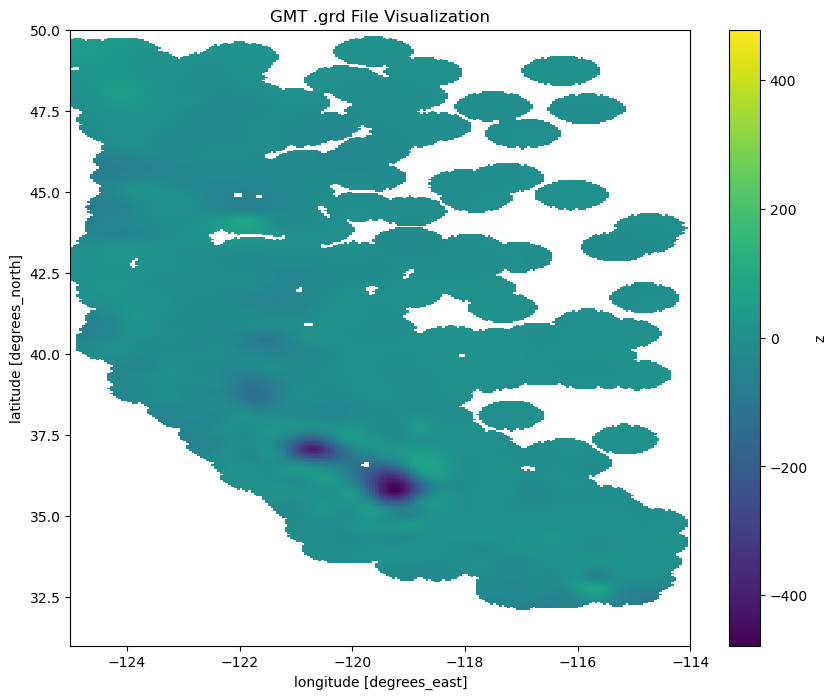

In [7]:
z = data['z']  # Replace 'z' with the actual variable name if different

# Plot the data
plt.figure(figsize=(10, 8))
z.plot(cmap="viridis")
plt.title("GMT .grd File Visualization")
plt.show()


In [13]:
# Replace 'EPSG:4326' with the correct CRS for your data
z.rio.write_crs("EPSG:4326", inplace=True)

# Export to GeoTIFF
output_tif = r"C:\Users\bvarugu\Downloads\DisplacementGrids_20241209\dynamic_datum\gridded_products\verticals\dispUgrid_20241125.tif"
z.rio.to_raster(output_tif)

print(f"Exported GeoTIFF to {output_tif}")

# Close the dataset
data.close()

Exported GeoTIFF to C:\Users\bvarugu\Downloads\DisplacementGrids_20241209\dynamic_datum\gridded_products\verticals\dispUgrid_20241125.tif


In [17]:
print(z)

<xarray.DataArray 'z' (lat: 380, lon: 220)>
[83600 values with dtype=float32]
Coordinates:
  * lon          (lon) float64 -125.0 -124.9 -124.9 ... -114.1 -114.1 -114.0
  * lat          (lat) float64 31.02 31.07 31.12 31.18 ... 49.88 49.92 49.98
    spatial_ref  int32 0
Attributes:
    long_name:     z
    actual_range:  [-478.33944702   84.23832703]
